In [35]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [36]:
df_train = pd.read_csv('house_train_easy.csv', index_col = 0)

In [37]:
df_train.columns

Index(['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
       'YrSold', 'SalePrice'],
      dtype='object')

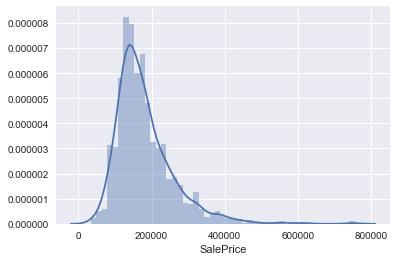

In [38]:
sns.distplot(df_train['SalePrice'])

In [39]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [40]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [41]:
correlation = df_train.corr()
correlation

,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,1stFlrSF,2ndFlrSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,YrSold,SalePrice
LotArea,1.000000,0.014228,0.105806,-0.005636,0.013788,0.299475,0.050986,0.260833,0.263116,0.126031,0.014259,0.190015,0.271364,0.154871,0.077672,-0.014261,0.263843
YearBuilt,0.014228,1.000000,0.572323,-0.375983,0.592855,0.281986,0.010308,0.391452,0.199010,0.468271,0.242656,0.095589,0.147716,0.537850,0.004950,-0.013618,0.522897
OverallQual,0.105806,0.572323,1.000000,-0.091932,0.550684,0.476224,0.295493,0.537808,0.593007,0.550600,0.273458,0.427452,0.396765,0.600671,0.065166,-0.027347,0.790982
OverallCond,-0.005636,-0.375983,-0.091932,1.000000,0.073741,-0.144203,0.028942,-0.171098,-0.079686,-0.194149,-0.060769,-0.057583,-0.023820,-0.185758,-0.001985,0.043950,-0.077856
YearRemodAdd,0.013788,0.592855,0.550684,0.073741,1.000000,0.240379,0.140024,0.291066,0.287389,0.439046,0.183331,0.191740,0.112581,0.420622,0.005829,0.035743,0.507101
1stFlrSF,0.299475,0.281986,0.476224,-0.144203,0.240379,1.000000,-0.202646,0.819530,0.566024,0.380637,-0.119916,0.409516,0.410531,0.439317,0.131525,-0.013604,0.605852
2ndFlrSF,0.050986,0.010308,0.295493,0.028942,0.140024,-0.202646,1.000000,-0.174512,0.687501,0.421378,0.609707,0.616423,0.194561,0.183926,0.081487,-0.028700,0.319334
TotalBsmtSF,0.260833,0.391452,0.537808,-0.171098,0.291066,0.819530,-0.174512,1.000000,0.454868,0.323722,-0.048804,0.285573,0.339519,0.434585,0.126053,-0.014969,0.613581
GrLivArea,0.263116,0.199010,0.593007,-0.079686,0.287389,0.566024,0.687501,0.454868,1.000000,0.630012,0.415772,0.825489,0.461679,0.467247,0.170205,-0.036526,0.708624
FullBath,0.126031,0.468271,0.550600,-0.194149,0.439046,0.380637,0.421378,0.323722,0.630012,1.000000,0.136381,0.554784,0.243671,0.469672,0.049604,-0.019669,0.560664


The highest correlation to SalePrice is OverallQual (.79), followed by GrLivArea (0.708), followed by GarageCars, and 1stFlrSF

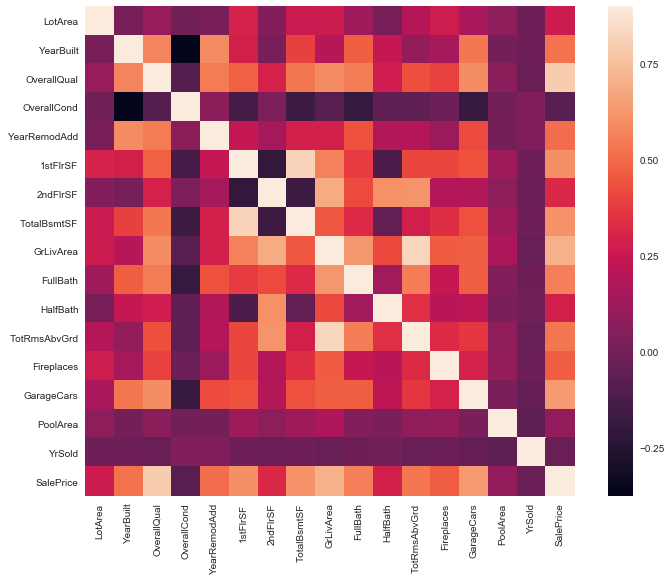

In [42]:
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation, vmax=.9, square=True)

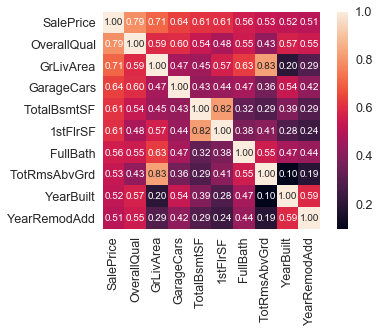

In [43]:
k = 10
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f', annot_kws={'size':10},
                yticklabels=cols.values,
                xticklabels=cols.values)
plt.show()

Since we don't know how overall quality was quantified, we will first start with GrLivArea (0.708 correlation to SalesPrice)

Text(0.5,1,'Above Ground Living Area Against Sale Price')

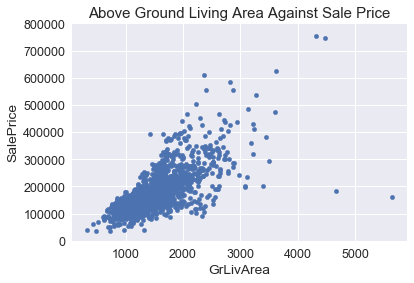

In [44]:
# Scatter Plot of grliarea/saleprice
var1 = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y='SalePrice', ylim=(0, 800000))
plt.title('Above Ground Living Area Against Sale Price')

Text(0.5,1,'GarageCars against Sale Price')

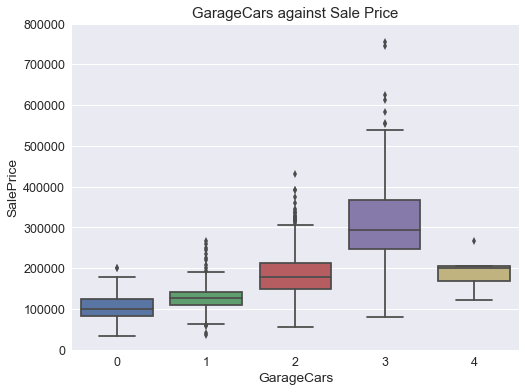

In [45]:
# Scatter plot of totalBsmtSF/saleprice
var2 = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var2]], axis=1)
f, ax = plt.subplots (figsize=(8, 6))
fig = sns.boxplot(x=var2, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)
plt.title('GarageCars against Sale Price')

2 car garage hugs the middle 50% of the mean SalePrice, looks like 3 car garage is more important that 4 car

(-0.5, 9.5, 0, 800000)

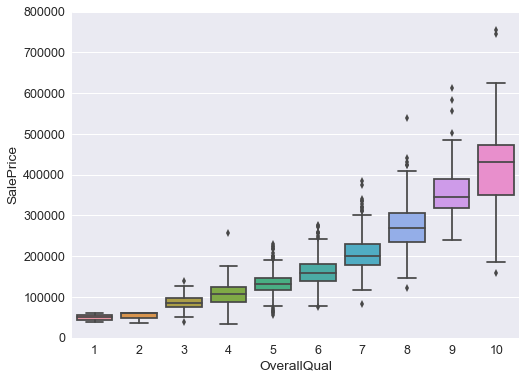

In [46]:
var3 = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var3]], axis=1)
f, ax = plt.subplots (figsize=(8, 6))
fig = sns.boxplot(x=var3, y='SalePrice', data = data)
fig.axis(ymin=0, ymax=800000)

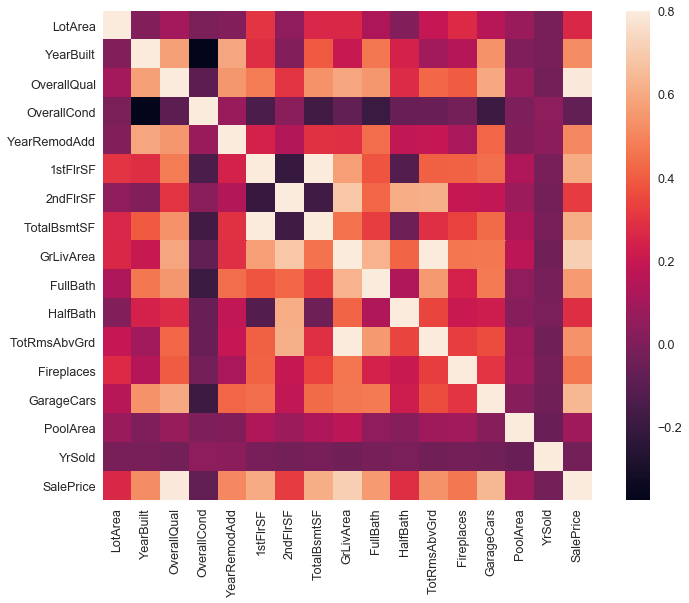

In [47]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

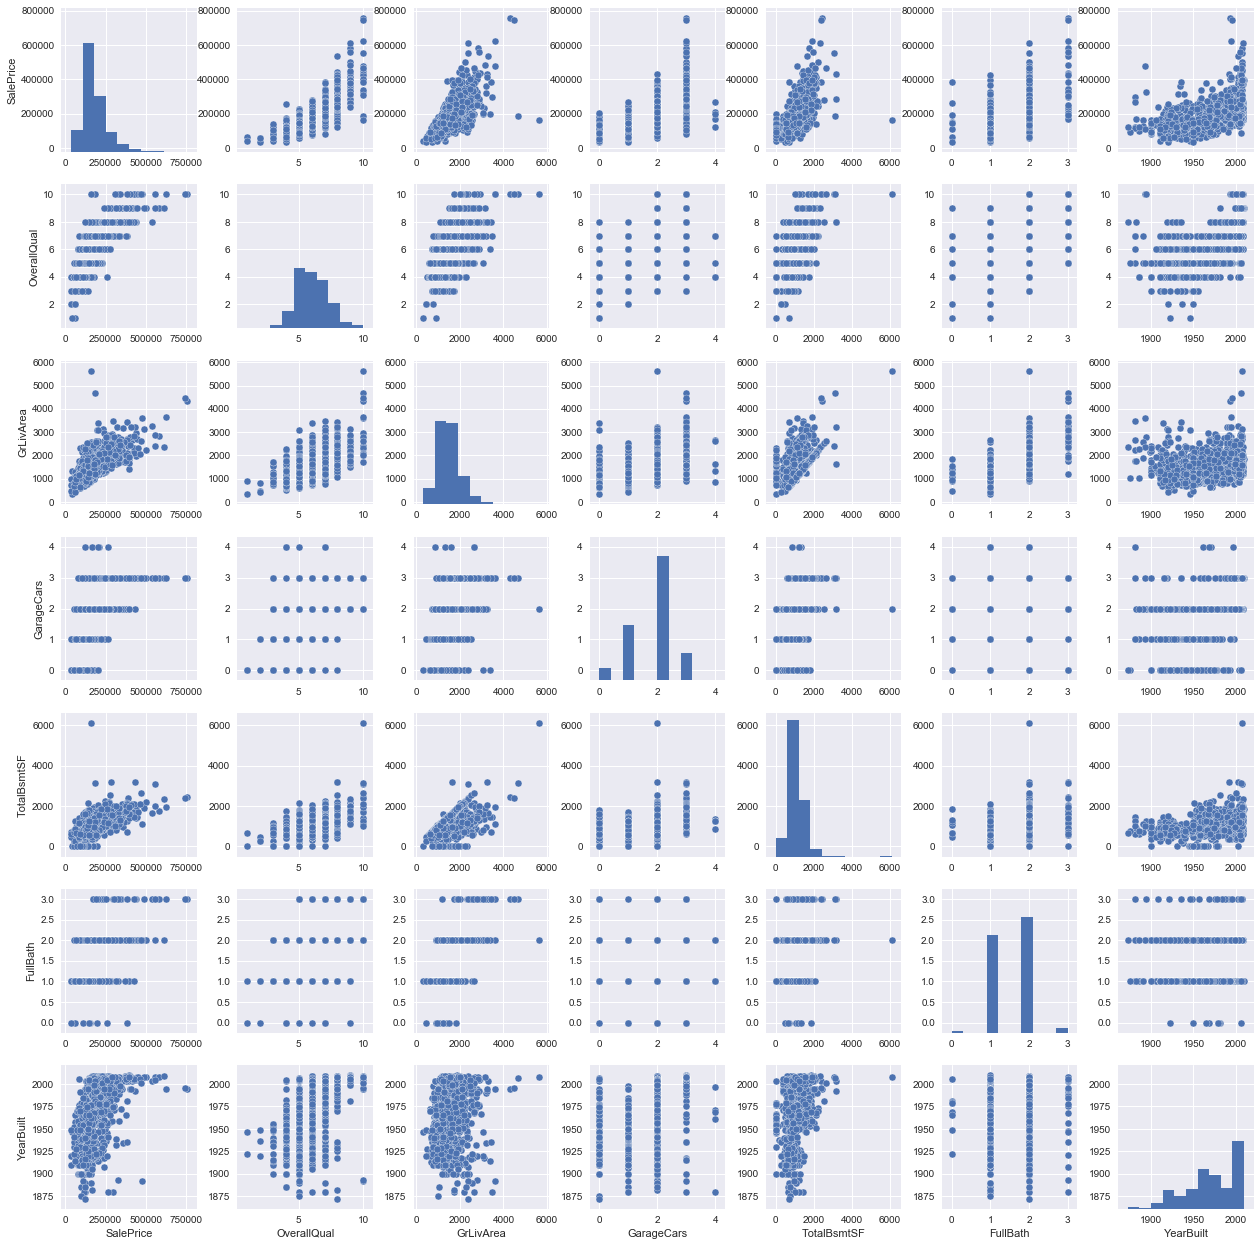

In [48]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [49]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SalePrice,0,0.0
TotalBsmtSF,0,0.0
YearBuilt,0,0.0
OverallQual,0,0.0
OverallCond,0,0.0
YearRemodAdd,0,0.0
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
GrLivArea,0,0.0
YrSold,0,0.0


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
X = df_train.drop('SalePrice', axis=1)

In [52]:
X

,LotArea,YearBuilt,OverallQual,OverallCond,YearRemodAdd,1stFlrSF,2ndFlrSF,TotalBsmtSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,YrSold
Id,,,,,,,,,,,,,,,,
1,8450,2003,7,5,2003,856,854,856,1710,2,1,8,0,2,0,2008
2,9600,1976,6,8,1976,1262,0,1262,1262,2,0,6,1,2,0,2007
3,11250,2001,7,5,2002,920,866,920,1786,2,1,6,1,2,0,2008
4,9550,1915,7,5,1970,961,756,756,1717,1,0,7,1,3,0,2006
5,14260,2000,8,5,2000,1145,1053,1145,2198,2,1,9,1,3,0,2008
6,14115,1993,5,5,1995,796,566,796,1362,1,1,5,0,2,0,2009
7,10084,2004,8,5,2005,1694,0,1686,1694,2,0,7,1,2,0,2007
8,10382,1973,7,6,1973,1107,983,1107,2090,2,1,7,2,2,0,2009
9,6120,1931,7,5,1950,1022,752,952,1774,2,0,8,2,2,0,2008


In [53]:
Y = df_train['SalePrice']

In [54]:
Y[:5]

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [55]:
lm = LinearRegression()
lm.fit(X,Y)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

-852825.78432
[  5.47304754e-01   4.10620752e+02   1.84795719e+04   5.40128491e+03
   2.00975572e+02   2.98808428e+01   2.09338223e+01   2.06625799e+01
   2.79173611e+01  -5.59033145e+03  -1.27721163e+03   4.15012124e+02
   7.43006051e+03   1.30428866e+04  -3.21756701e+01  -2.24288925e+02]
Number of coefficients is  16


In [57]:
lm.predict(X[:5])

array([ 208646.98058545,  188725.26750976,  221364.95744117,
        193071.38916495,  281756.11540482])

In [60]:
mseFull = ((Y[:5] - lm.predict(X[:5])) ** 2)
print(mseFull)

Id
1    2.160329e+04
2    5.220449e+07
3    4.558407e+06
4    2.816572e+09
5    1.008451e+09
Name: SalePrice, dtype: float64
